#Processing, Visualizing and Reconstructing MRI Data

Objective: Create a pipeline for exploring MRI data visualization strategies. Visualize MRI images with and without tumor.  Improve the contrast of MRI data and visualize the effects. Create a simulation of an MRI phantom and implement a commonly used MRI reconstruction algorithm

Workflow:
1. Visualize MRI data
   * Load the MRI dataset
   * Open and display a random set of 10 images (with and without a tumor) from the dataset
   * Estimate image statistics- mean, max, min, standard deviation of pixel values in an MRI image with and without tumor
   * Plot histogram of image intensities for MRI images with and without tumor

2. Implement a function to enhance the contrast of MR images
    * Load an image from the MRI dataset
    * Apply histogram equalization to improve contrast
    * Display before and after effects of equalization on an MRI image

3. MRI reconstruction using phantom image
      * Generate an analytical MRI phantom and visualize it
      * Generate a frequency space representation from the phantom
      * Apply blur in the frequency space using convolutions
      * Reconstruct the phantom image from the frequency domain representation

* Load MRI dataset from drive

In [ ]:
# Mount Google Drive to access files in Google Colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Import necessary libraries for image processing and visualization
import cv2
import matplotlib.pyplot as plt
import glob
import pandas as pd
import seaborn as sns
import numpy as np
from PIL import Image

# Define paths for tumor and non-tumor images
path_tumor = '/content/drive/MyDrive/colab_notebooks/lp2_files/mri_data_full/train/tumor'
path_notumor = '/content/drive/MyDrive/colab_notebooks/lp2_files/mri_data_full/train/notumor'


## Read MR images (with and without tumor) from dataset

Total MRI with tumor count:  1339
Total MRI without tumor count:  1595


Text(0, 0.5, 'Number of MR images')

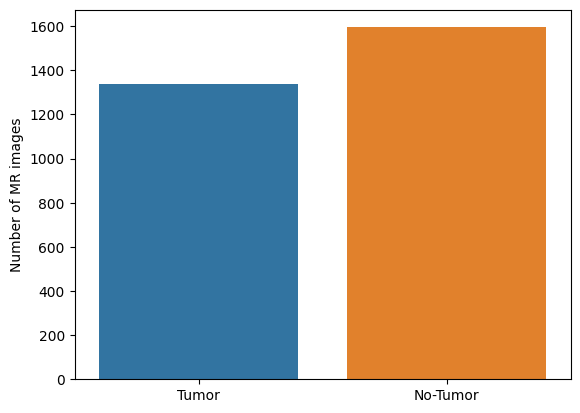

In [ ]:


# Use glob to get a list of tumor and non-tumor image files
tumor_files = glob.glob(path_tumor + '/*')
nontumor_files = glob.glob(path_notumor + '/*')

# Display the total count of MRI images with and without tumors
print("Total MRI with tumor count: ", len(tumor_files))
print("Total MRI without tumor count: ", len(nontumor_files))

# Create a bar plot to visualize the distribution of tumor and non-tumor images
fig = plt.figure()
ax = fig.add_subplot(111)
x = ['Tumor', 'No-Tumor']
y = [len(tumor_files), len(nontumor_files)]
ax = sns.barplot(x=x, y=y)
ax.set_ylabel('Number of MR images')



<Figure size 640x480 with 0 Axes>

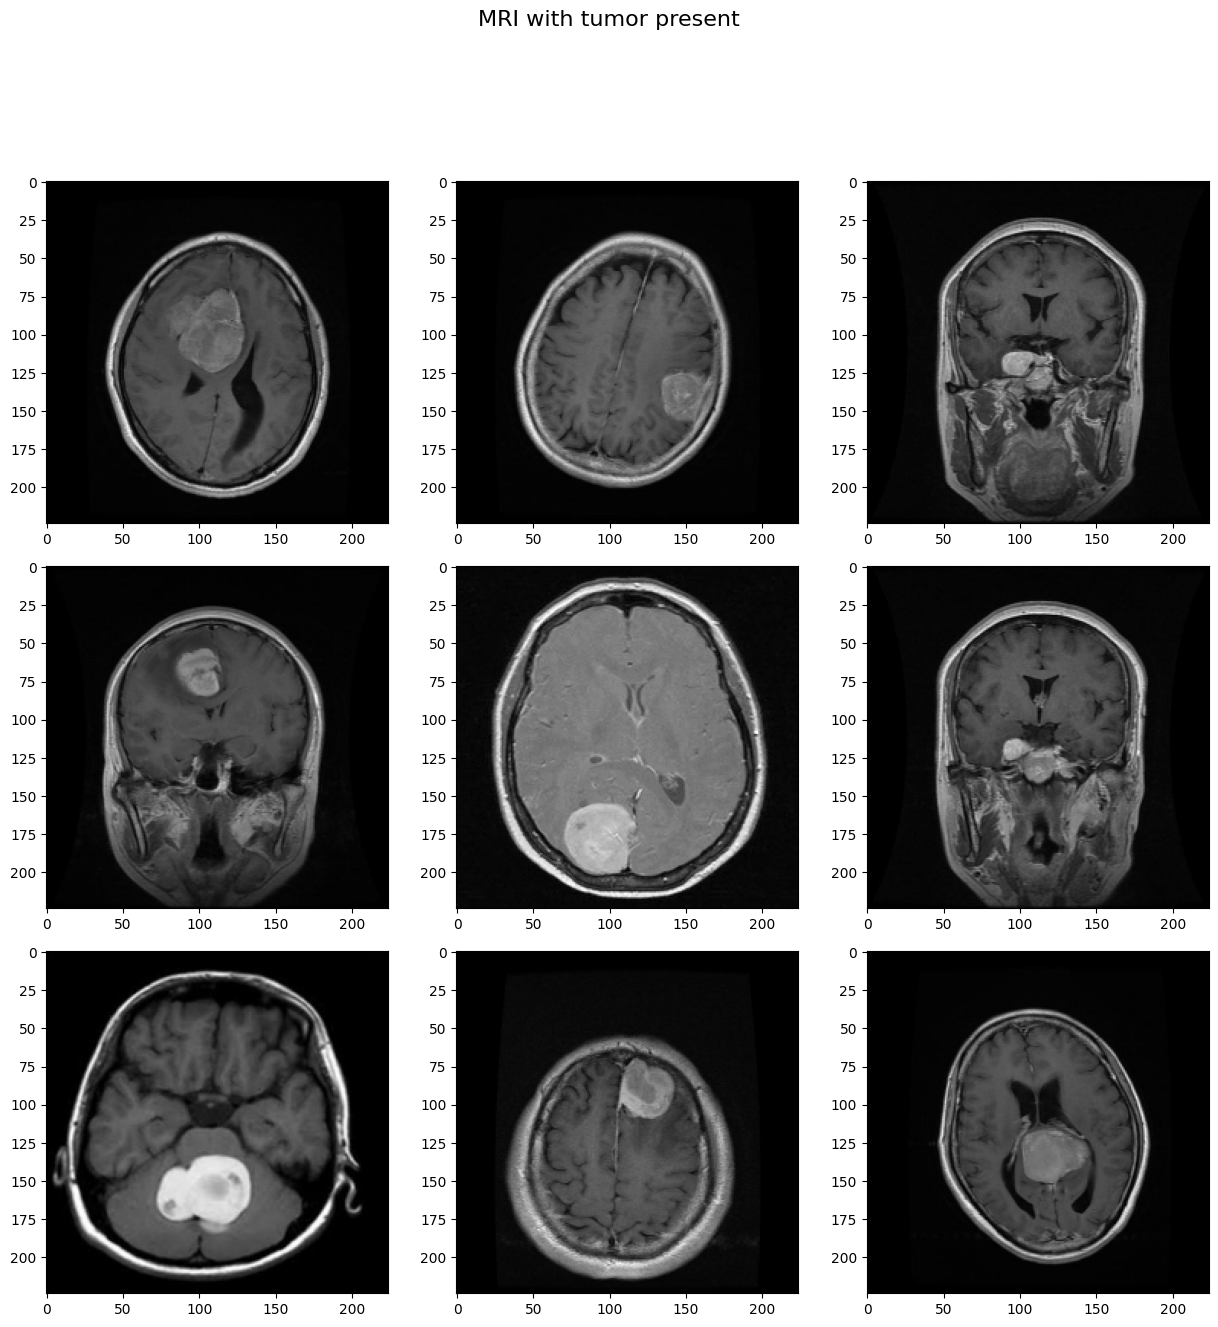

<Figure size 640x480 with 0 Axes>

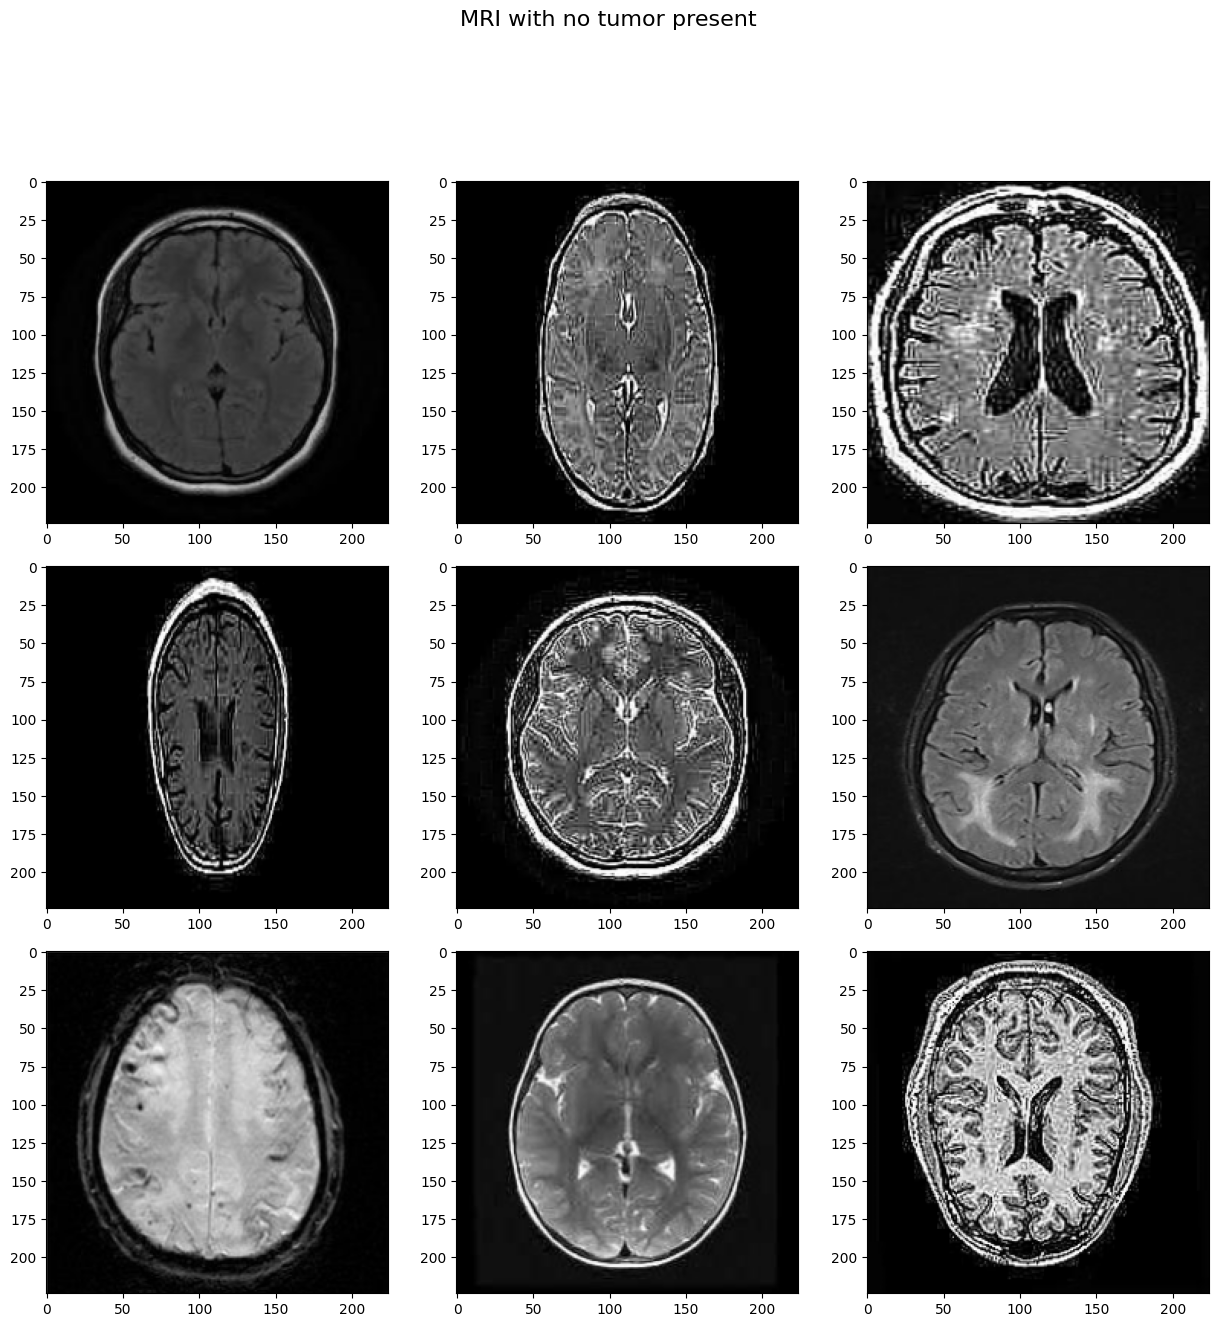

In [ ]:
# Set the figure size and create subplots for tumor-present MRI images
figsize = [10, 6]
fig = plt.figure()
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Loop through tumor images and display them in a 3x3 grid
for i, ax in enumerate(fig.axes):
    image = cv2.imread(tumor_files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))

    ax = plt.subplot(3, 3, i + 1)
    ax.imshow(image)
    plt.suptitle('MRI with tumor present', fontsize=16)
    plt.subplots_adjust(hspace=0)

# Create a new figure and subplots for tumor-absent MRI images
fig = plt.figure()
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Loop through non-tumor images and display them in a 3x3 grid
for i, ax in enumerate(fig.axes):
    image = cv2.imread(nontumor_files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))

    ax = plt.subplot(3, 3, i + 1)
    ax.imshow(image)
    plt.suptitle('MRI with no tumor present', fontsize=16)
    plt.subplots_adjust(hspace=0)


* ## Estimate image statistics- mean, max, min, standard deviation of pixel values in an MRI image with and without tumor
* ## Plot histogram of image intensities for MRI images with and without tumor

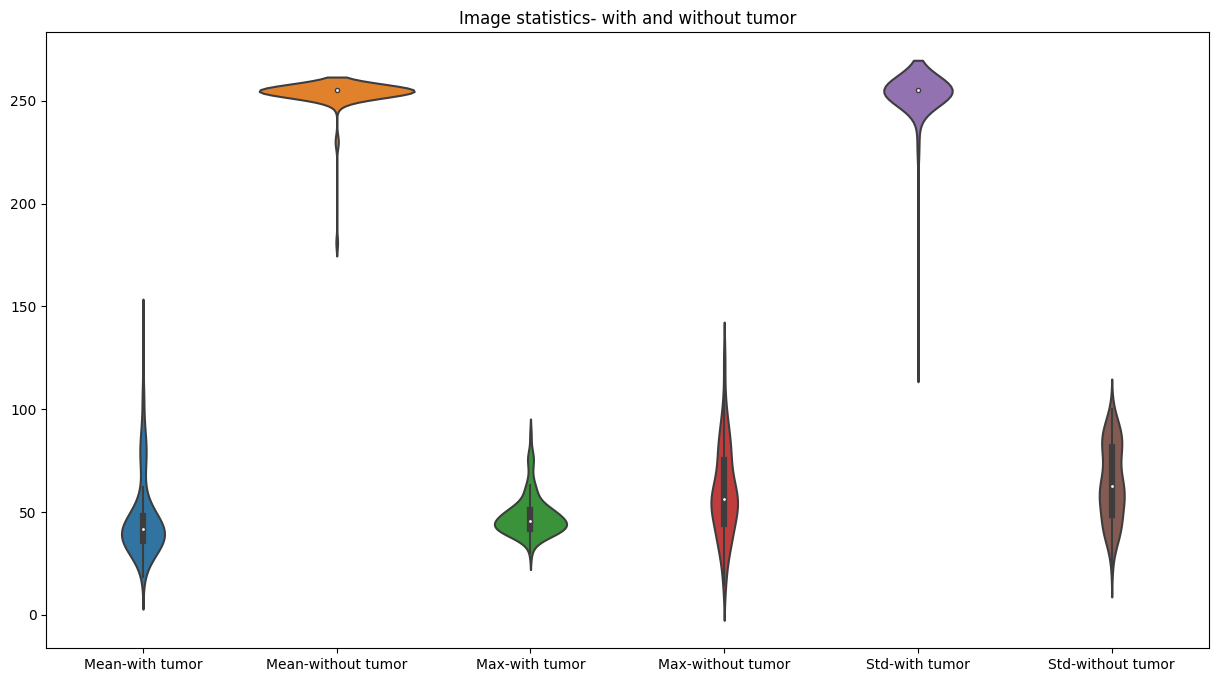

In [ ]:
import random as r
from numpy import asarray
from PIL.ImageStat import Stat
from PIL import Image
import numpy as np
import seaborn as sns

# Lists to store image statistics for tumor and non-tumor images
tum_mean = []
tum_max = []
tum_std = []

notum_mean = []
notum_max = []
notum_std = []

# Loop through 100 tumor images
for i in range(100):
    img = Image.open(tumor_files[i])
    tum_mean.append(np.mean(img))
    tum_max.append(np.max(img))
    tum_std.append(np.std(img))

# Loop through 100 non-tumor images
for i in range(100):
    img = Image.open(nontumor_files[i])
    notum_mean.append(np.mean(img))
    notum_max.append(np.max(img))
    notum_std.append(np.std(img))

# Create DataFrame from lists
df = pd.DataFrame(list(zip(tum_mean, tum_max, tum_std, notum_mean, notum_max, notum_std)),
                  columns=['Mean-with tumor', 'Mean-without tumor', 'Max-with tumor', 'Max-without tumor', 'Std-with tumor', 'Std-without tumor'])

# Create violin plot to compare image statistics for tumor and non-tumor images
plt.figure(figsize=(15, 8))
ax = sns.violinplot(data=df)
plt.title("Image statistics- with and without tumor")
plt.show()


Text(0.5, 1.0, 'Histogram for MRI without tumor')

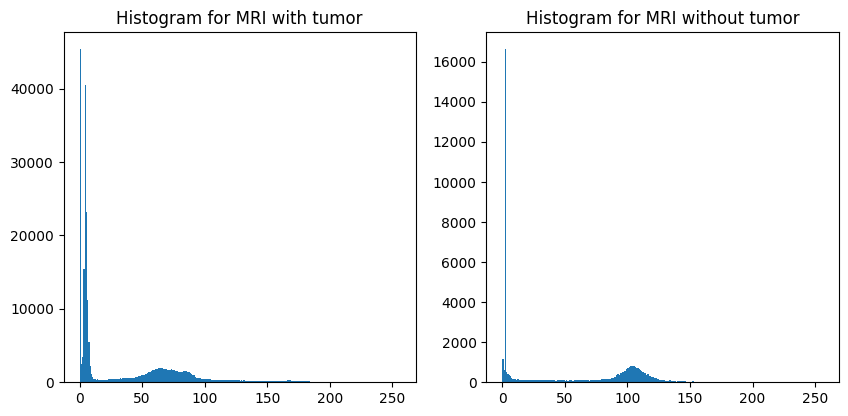

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(221)

# Select a random tumor image
i = r.randint(0, len(tumor_files))
im1 = cv2.imread(tumor_files[i], cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([im1], [0], None, [256], [0, 256])

# Plot histogram for MRI with tumor
ax1.hist(im1.ravel(), 256, [0, 256])
ax1.set_title('Histogram for MRI with tumor')

ax2 = fig.add_subplot(222)

# Select a random non-tumor image
j = r.randint(0, len(nontumor_files))
im2 = cv2.imread(nontumor_files[j], cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([im2], [0], None, [256], [0, 256])

# Plot histogram for MRI without tumor
ax2.hist(im2.ravel(), 256, [0, 256])
ax2.set_title('Histogram for MRI without tumor')



* Implement a function to enhance the contrast of MR images
    * Load an image from the MRI dataset
    * Apply histogram equalization to improve contrast
    * Display before and after effects on the MRI image done in Step 2.


Text(0.5, 1.0, 'Image after histogram equalization')

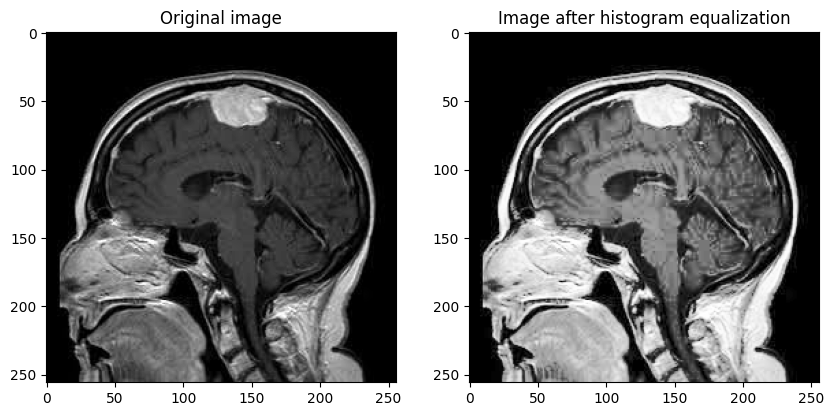

In [ ]:

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)

i= r.randint(0, len(tumor_files))

img = cv2.imread(tumor_files[i],cv2.IMREAD_GRAYSCALE)
#img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
hist_eq = cv2.equalizeHist(img)

hist_eq = cv2.cvtColor(hist_eq,cv2.COLOR_GRAY2RGB)

ax1.imshow(img, cmap= 'gray')
ax1.set_title('Original image')

ax2 = fig.add_subplot(222)

ax2.imshow(hist_eq, cmap= 'gray')
ax2.set_title('Image after histogram equalization')


  * # MRI reconstruction using phantom image
     * Generate an analytical MRI phantom and visualize it
     * Generate a frequency space representation from the phantom
     * Apply blur in the frequency space using convolutions
     * Reconstruct the phantom image from the frequency domain representation done in the previous step



In [ ]:
# Install the phantominator package
!pip install phantominator

import matplotlib.pyplot as plt
from phantominator import shepp_logan


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.1 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.1 which is incompatible.


Text(0.5, 1.0, 'Shepp Logan phantom')

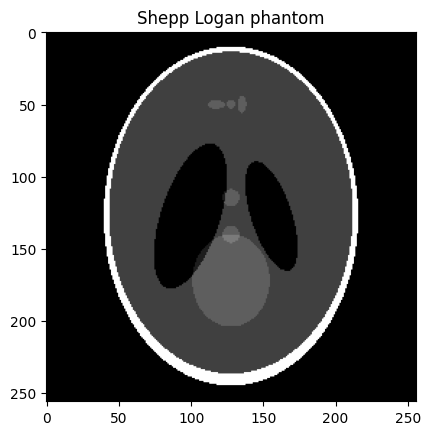

In [ ]:
# Create a 256 x 256 phantom

# Generate and plot a Shepp-Logan phantom image
true_img = shepp_logan(256)
plt.imshow(true_img, cmap='Greys_r')
plt.title("Shepp-Logan Phantom")


## Define functions for Fourier transform and its inverse, apply Fourier transform to the Shepp-Logan phantom, and visualize both the original image and its Fourier transform magnitude.

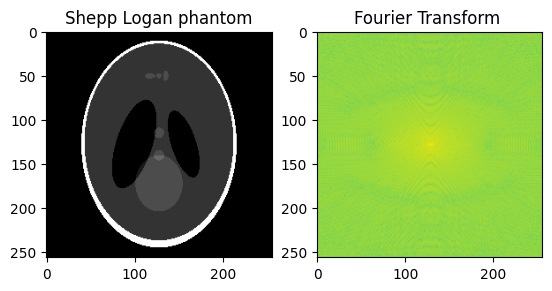

In [ ]:
# Define Fourier transform functions and visualize
from scipy.fft import fftn, ifftn, fftshift, ifftshift

# Fourier transform in k-space
mri_fft = lambda x: ifftshift(fftn(fftshift(x)))

# Inverse Fourier transform
mri_ifft = lambda x: ifftshift(ifftn(fftshift(x)))

# Apply Fourier transform to the Shepp-Logan phantom
k_space = mri_fft(true_img)

# Visualize the original image and its Fourier transform magnitude
mag = 20 * np.log(np.abs(k_space))
plt.subplot(121), plt.imshow(true_img, cmap='gray')
plt.title("Shepp-Logan Phantom")
plt.subplot(122), plt.imshow(mag, cmap='viridis')
plt.title("Fourier Transform Magnitude")
plt.show()


<ipython-input-15-b8c2bcd0b8ea>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(mag,cmap='viridis')


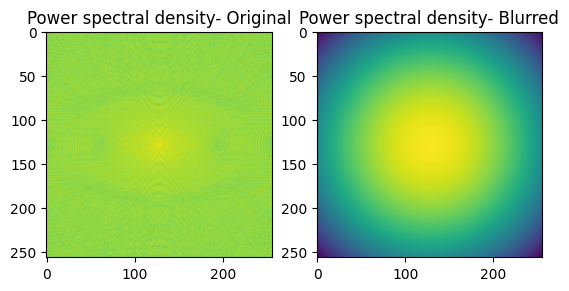

In [ ]:
#Build and apply a Gaussian filter for blurring

# Generate a Gaussian blur mask
ncols, nrows = 256, 256
sigx, sigy = 10, 10
cy, cx = nrows / 2, ncols / 2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
blurmask = np.exp(-(((X - cx) / sigx) ** 2 + ((Y - cy) / sigy) ** 2))

# Apply the blur mask to the Fourier-transformed image
ftimagep = k_space * blurmask
plt.imshow(np.abs(ftimagep))

# Plot power spectrum before and after blurring
mag_blur = 20 * np.log(np.abs(ftimagep))
plt.subplot(121), plt.imshow(mag, cmap='viridis')
plt.title("Power Spectral Density - Original")
plt.subplot(122), plt.imshow(mag_blur, cmap='viridis')
plt.title("Power Spectral Density - Blurred")
plt.show()





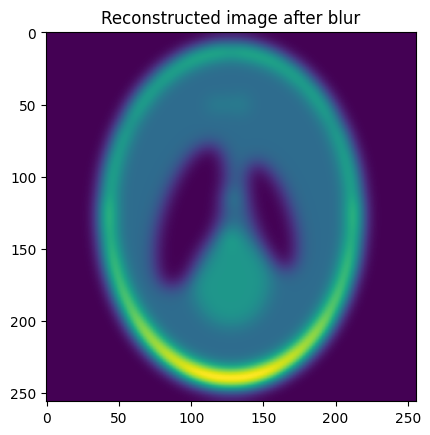

In [ ]:
# For reconstructing the phantom from k-space after blurring, ake the inverse transform and show the blurred image
# Reconstruct the image after blurring using inverse Fourier transform
imagep = mri_ifft(ftimagep)
res = Image.fromarray(abs(imagep))
plt.title("Reconstructed Image After Blur")
plt.imshow(np.abs(res))

